In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [41]:
data = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [43]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [44]:
#encoding the categorical variables
for column in ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    data[column] = LabelEncoder().fit_transform(data[column])

In [45]:
#normalizing numerical features
for column in ['Age', 'YearsAtCompany', 'MonthlyIncome', 'DistanceFromHome']:
    data[column] = StandardScaler().fit_transform(data[[column]])

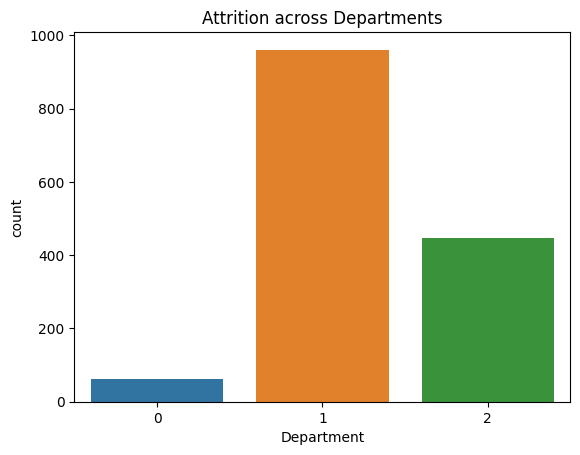

In [46]:
sns.countplot(x='Department', data=data)
plt.title('Attrition across Departments')
plt.show()

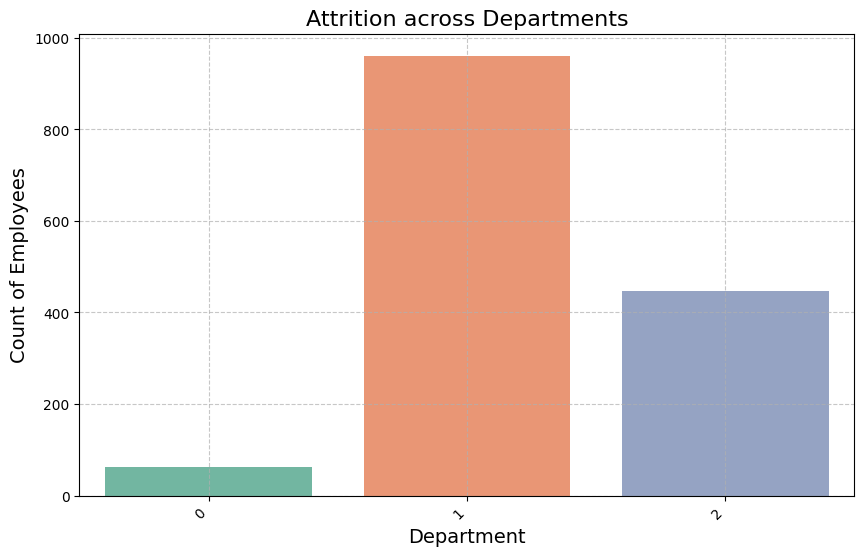

In [47]:

plt.figure(figsize=(10, 6))

sns.countplot(x='Department', data=data, palette='Set2')

plt.title('Attrition across Departments', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Count of Employees', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


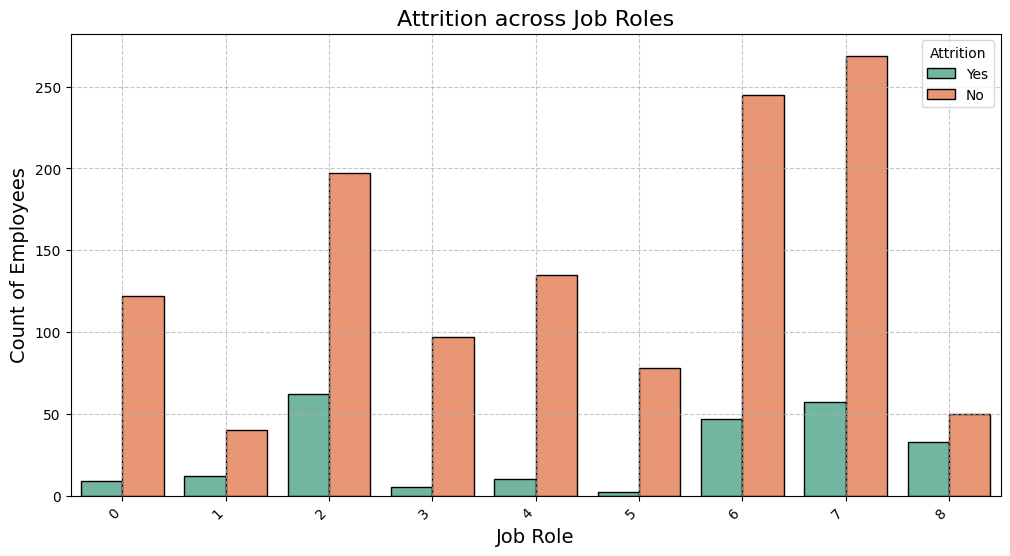

In [48]:

plt.figure(figsize=(12, 6))

sns.countplot(x='JobRole', hue='Attrition', data=data, palette='Set2', edgecolor='black')

plt.title('Attrition across Job Roles', fontsize=16)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Count of Employees', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [49]:
data['BusinessTravel'] = data['BusinessTravel'].map({
    'Travel_Frequently': 2,
    'Travel_Rarely': 1,
    'Non-Travel': 0
})

In [50]:
data['Department'] = LabelEncoder().fit_transform(data['Department'])

In [51]:
data['EducationField'] = LabelEncoder().fit_transform(data['EducationField'])

In [52]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [53]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField']
for column in categorical_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

In [54]:
numeric_columns = ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 
                   'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
                   'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 
                   'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [55]:
X = data[numeric_columns]
y = data['Attrition']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train

SyntaxError: incomplete input (823025023.py, line 2)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
precision = precision_score(y_test, y_pred)

In [ ]:
recall = recall_score(y_test, y_pred)

In [ ]:
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['No Attrition', 'Attrition'], 
            yticklabels=['No Attrition', 'Attrition'], 
            cbar_kws={'shrink': 0.8}, linewidths=1, linecolor='black')

plt.title("Confusion Matrix of Attrition Prediction", fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
